로지스틱 회귀-유방암
==
- 로지스틱회귀의 개념
- BreastCancer.csv

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
#from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn import metrics
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [142]:
#합격자
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
#불합격자
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [143]:
X = np.hstack((pass_time,fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [144]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

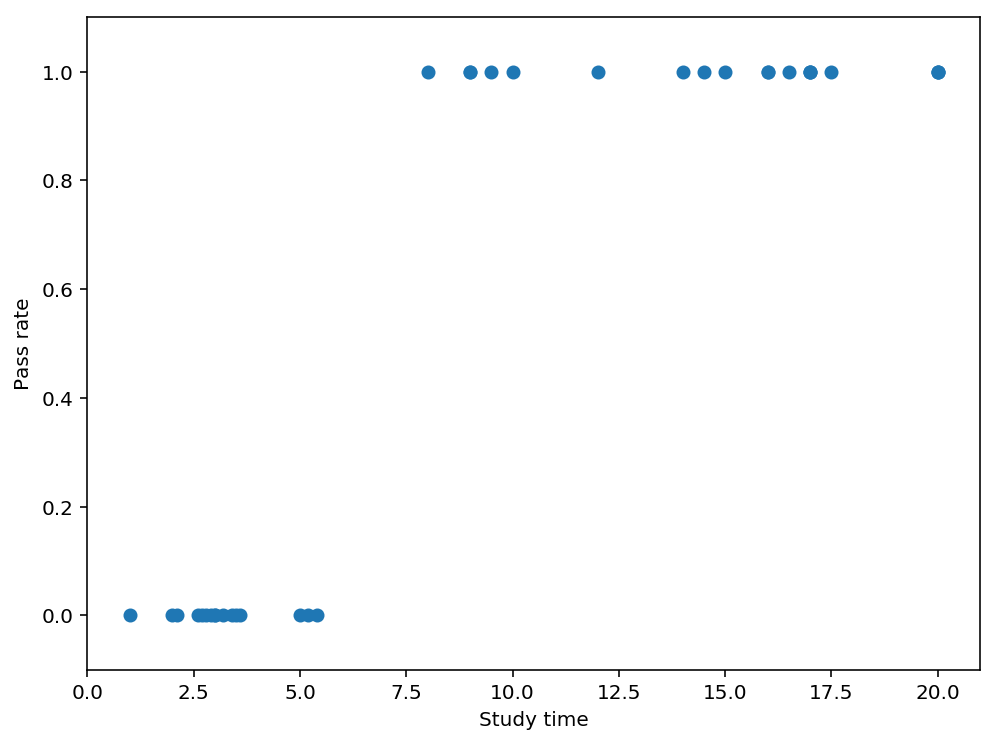

In [145]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

In [146]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1),y)

print(model.coef_)
print(model.intercept_)

[[0.40606369]]
[-2.47960598]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [147]:
a, b = model.coef_, model.intercept_

In [148]:
model.predict([[6.9]])

array([1])

In [149]:
model.predict_proba([[13]])

array([[0.05736623, 0.94263377]])

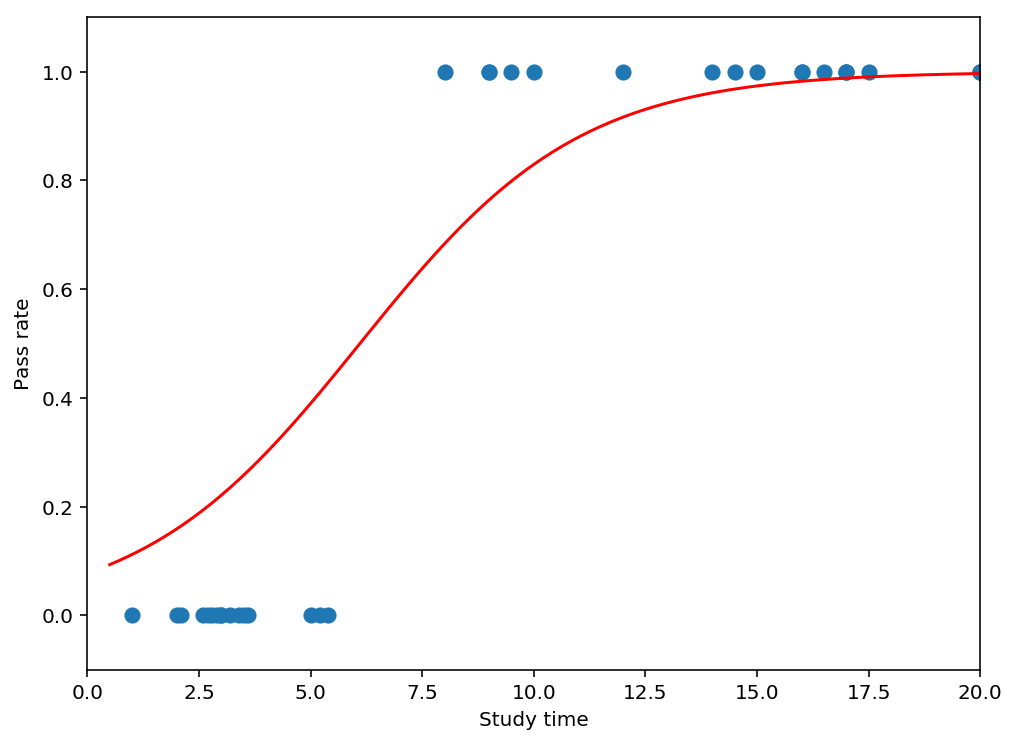

In [150]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5,21, 100)
yy = logreg(a*XX + b)[0]
plt.plot(XX, yy, c='r')
# plt.show()

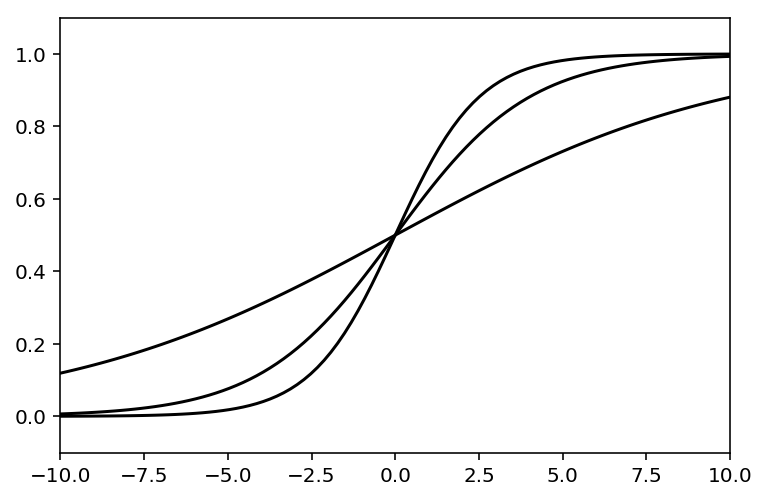

In [151]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.2, 0.5, 0.8]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

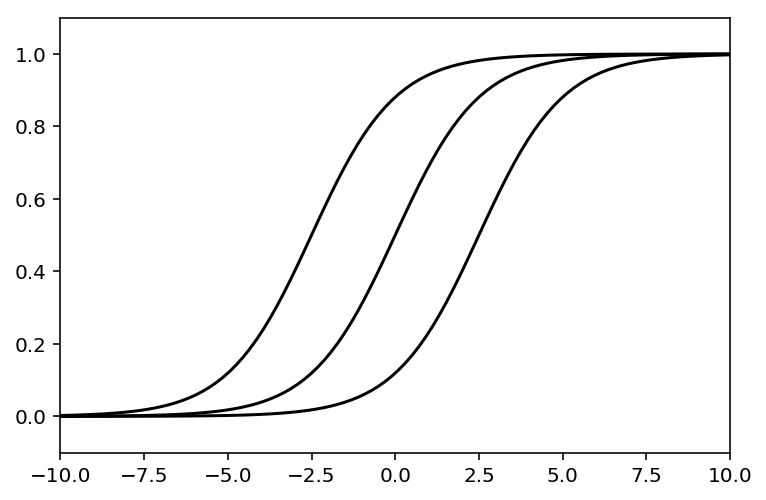

In [152]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

In [153]:
# 실습

In [154]:
#합격자
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5]
#불합격자
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]
# TV 시간 pass
tv_pass = [3.4, 2.8, 2.1, 3.2, 1.1,1,2.2,3,3.2,3.4,3.5,3.6,3,2,2,4]
# TV 시간 fail
tv_fail = [5.4, 7.8, 8.1, 7.2, 7,8,6.5, 7.1 ,4.2, 4.7, 8.3, 9.6,5.1, 6.3, 7.9, 6.7]

In [155]:
X1 = np.hstack((pass_time,fail_time))
X2 = np.hstack((tv_pass, tv_fail))

y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
yy = np.hstack((y1,y0))
yy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [156]:
XX = pd.DataFrame({'study_time':X1})
YY = pd.DataFrame({'tv_time':X2})
Z = pd.concat([XX,YY],axis=1)
Z['pass'] = yy

In [157]:
X_var = Z[['study_time','tv_time']]
y_result = Z['pass']

In [158]:
model = LogisticRegression()
model.fit(X_var,y_result)

print(model.coef_)
print(model.intercept_)

[[ 0.70359094 -1.03973981]]
[-0.10478191]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [159]:
a1, a2, bb = model.coef_[0][0], model.coef_[0][1], model.intercept_

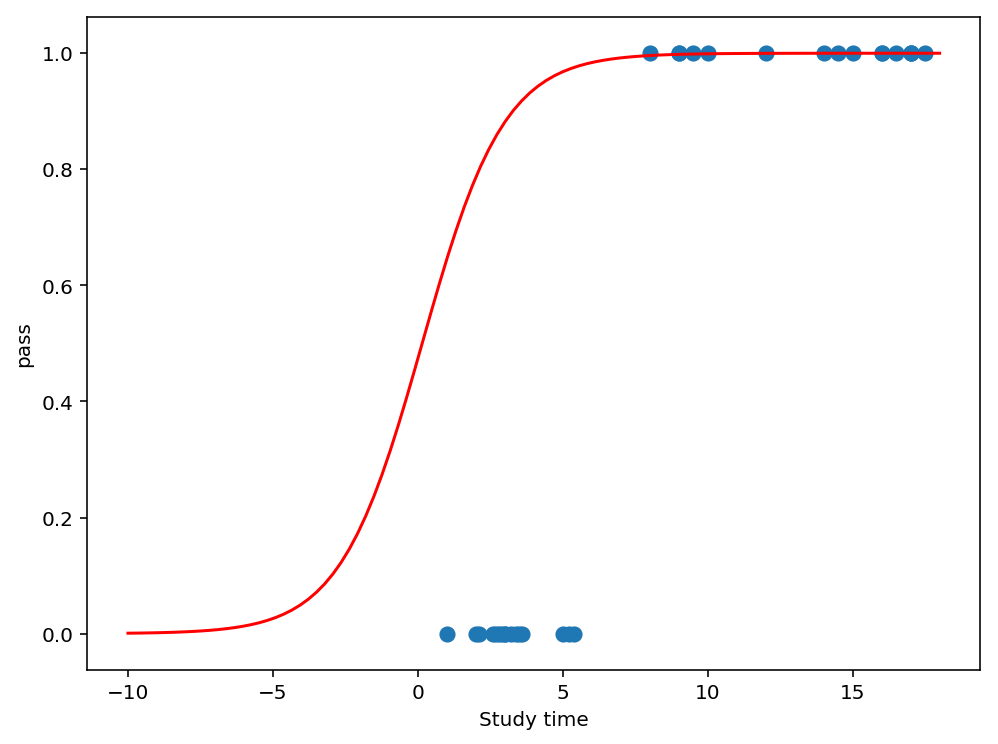

In [160]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
# plt.xlim(0, 20)
# plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('pass')
plt.scatter(X_var['study_time'], y_result, s=50)

XX1 = np.linspace(-10,18,100)
yy1 = logreg(a1*XX1 + bb)
plt.plot(XX1, yy1, c='r')
# plt.show()

In [161]:
# 유방암 환자
from sklearn.datasets import load_breast_cancer

In [162]:
data_all = load_breast_cancer()

In [163]:
type(data_all)

sklearn.utils.Bunch

In [164]:
data = data_all.data
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [165]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [166]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

In [167]:
df = pd.DataFrame(data, columns=data_all.feature_names)
df["diagnosis"] = data_all.target
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [168]:
df.shape

(569, 31)

In [169]:
#data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
df = df[["diagnosis", "mean radius", "mean texture"]]
df.head()

,diagnosis,mean radius,mean texture
0,0,17.99,10.38
1,0,20.57,17.77
2,0,19.69,21.25
3,0,11.42,20.38
4,0,20.29,14.34


In [170]:
model = LogisticRegression()
y = df["diagnosis"]

In [171]:
features = ["mean radius"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.96%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [172]:
print(model.coef_)
print(model.intercept_)

[[-0.48325363]]
[7.3485004]


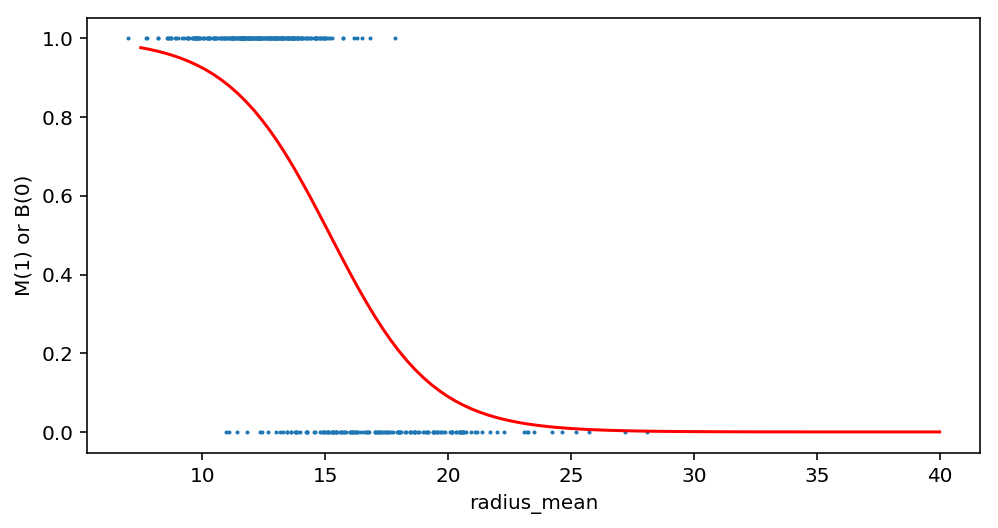

In [173]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
#from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn import metrics

In [175]:
# data = pd.read_csv('data/breast_cancer.csv')
# print(data.shape)

In [176]:
# data.head()

In [177]:
# data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
# df = data[["diagnosis", "radius_mean", "texture_mean"]]
# df.head()

In [178]:
# model=LogisticRegression()
# y = df["diagnosis"]

In [180]:
features = ["mean radius"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.96%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [181]:
X_test.shape

(171, 1)

In [182]:
print(model.coef_)
print(model.intercept_)

[[-0.48325363]]
[7.3485004]


In [ ]:
# plt.figure(figsize=(8,4))
# plt.scatter(X_train, y_train, s=1)
# plt.xlabel("radius_mean")
# plt.ylabel("M(1) or B(0)")

# def logreg(x):
#     return 1 / (1 + np.exp(-x))

# XX = np.linspace(7.5, 40, 100)
# plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [183]:
features = ["mean texture"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 66.08%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [184]:
print(model.coef_)
print(model.intercept_)

[[-0.17814003]]
[3.99279766]


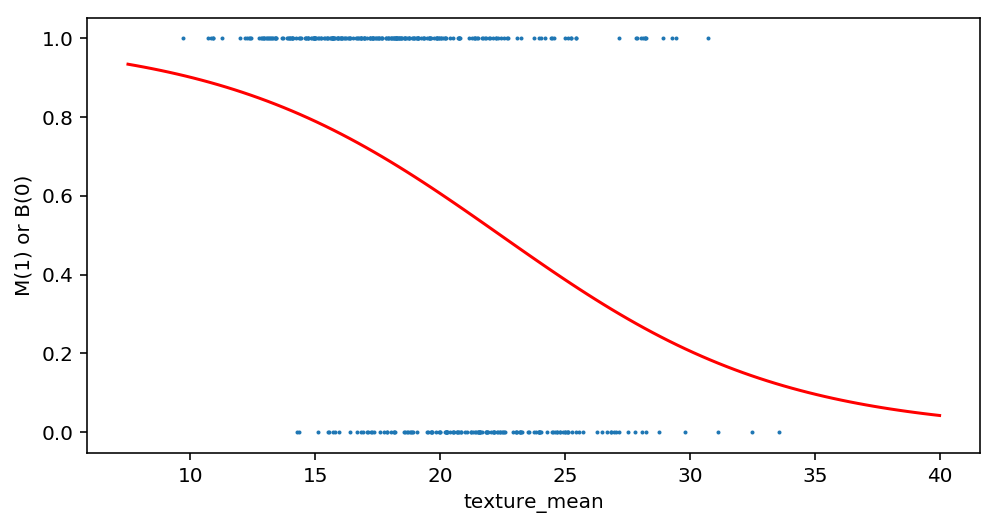

In [185]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [187]:
features = ["mean radius", "mean texture"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 88.30%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [188]:
# 30개 써서 로지스틱 회귀
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 95.32%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [189]:
# 30개 써서 선형 분류 회귀
clf4 = SGDClassifier()

clf4.fit(X_train, y_train)
print("Score: {0:.2%}".format(clf4.score(X_test, y_test)))

Score: 69.01%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [190]:
# 30개 스케일링 해서 선형 분류

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, test_size = 0.3)

In [191]:
clf4 = SGDClassifier()
clf4.fit(X_train, y_train)
print("Score: {0:.2%}".format(clf4.score(X_test, y_test)))

Score: 93.57%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [194]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["mean radius"][y_train == i]
    ys = X_train["mean texture"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행

data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
X=data.drop('diagnosis', axis=1)

In [ ]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))

In [199]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 95.91%
K =  3 -> Score: 97.08%
K =  5 -> Score: 96.49%
K =  7 -> Score: 96.49%
K =  9 -> Score: 96.49%
K =  11 -> Score: 95.32%
K =  13 -> Score: 94.74%
K =  15 -> Score: 95.32%
K =  17 -> Score: 95.91%
K =  19 -> Score: 95.91%


In [200]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 94.74%


In [201]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 95.32%


## 소프트맥스
- 다항 로지스틱스

In [ ]:
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))